

## Web scraping and analysis


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 37
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | The flight was comfortable eno...
1,✅ Trip Verified | We had a really good flying...
2,✅ Trip Verified | Waited an hour to check-in ...
3,Not Verified | Not a great experience at all...
4,✅ Trip Verified | Boarding was difficult caus...


In [4]:
os.makedirs('data_review',mode=0o666,exist_ok=True)
df.to_csv("data/BA_reviews.csv")

In [5]:
from tqdm import tqdm_notebook as tq

In [6]:
rev =[]
for s in tq(df['reviews']):
    try:
        rev.append(s.split('|')[1])
    except:
        rev.append(s)

C:\Users\nik75\AppData\Local\Temp\ipykernel_9972\2733595226.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for s in tq(df['reviews']):


  0%|          | 0/3700 [00:00<?, ?it/s]

In [7]:
df['clean_rev'] = rev

In [8]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.tokenize import word_tokenize as wt

In [9]:
corpus=[]
wnl=WordNetLemmatizer()

st = stopwords.words('english')
st.extend(['ba', 'british', 'airway','plane' ,'flight','airline','aircraft'])

for i in tq(rev):
    text = re.sub('[^a-zA-Z]'," ",i)
    text=text.lower()
    text= wt(text)
    text = [wnl.lemmatize(word) for word in text if word not in st ]
    text = [word for word in text if word not in st]
    text= " ".join(text)
    corpus.append(text)
    

C:\Users\nik75\AppData\Local\Temp\ipykernel_9972\2455285680.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tq(rev):


  0%|          | 0/3700 [00:00<?, ?it/s]

In [10]:
df['clean_rev'] = corpus

In [11]:
def find_pol(review):
    return round(TextBlob(review).sentiment.polarity,5)

In [12]:
df['sentiment'] = df['clean_rev'].apply(find_pol)

In [13]:
def labels(review):
    if review >0:
        return 'positive'
    elif review <0:
        return 'negative'
    else:
        return 'neutral'

In [14]:
df['label'] = df['sentiment'].apply(labels)

In [15]:
df['label'].value_counts()

positive    2592
negative    1075
neutral       33
Name: label, dtype: int64

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [17]:
pos_word = " ".join([sent for sent in df['clean_rev'][df['label']=='positive']])
wc = WordCloud(width=800,height=500,random_state=50,max_font_size=100).generate(pos_word)

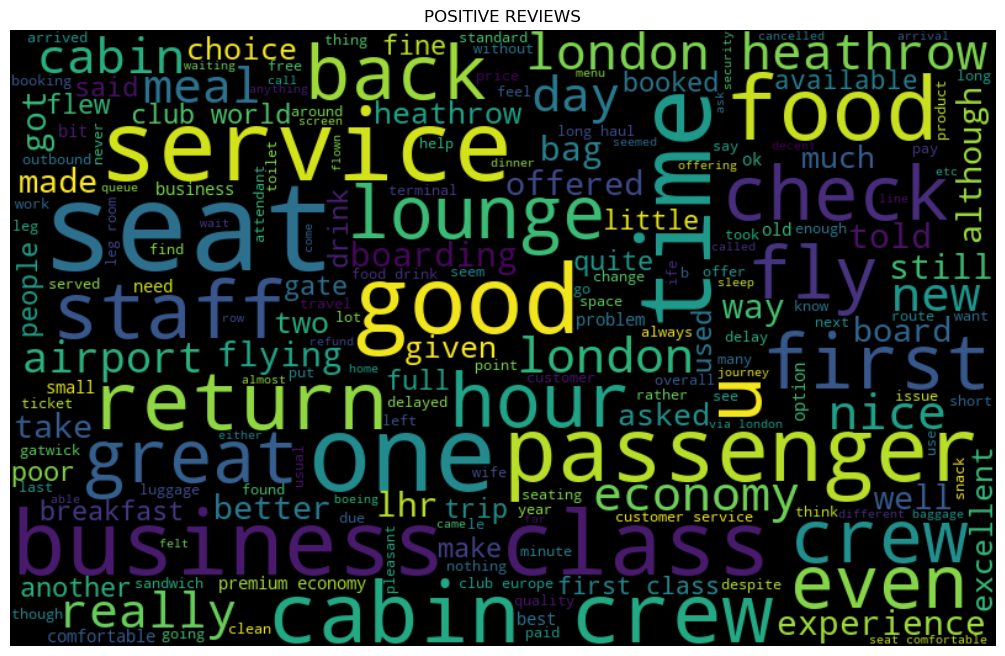

In [18]:
plt.figure(figsize=(15,8))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.title("POSITIVE REVIEWS")
plt.show()

In [19]:
neg_word = " ".join([sent for sent in df['clean_rev'][df['label']=='negative']])
wc2 = WordCloud(width=800,height=500,random_state=50,max_font_size=100).generate(neg_word)

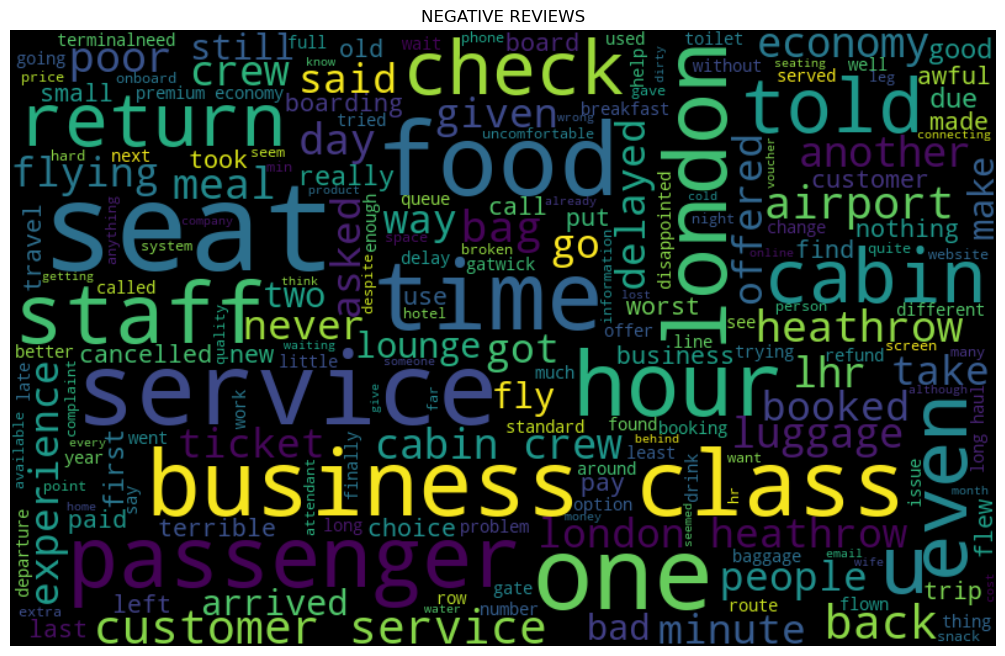

In [20]:
plt.figure(figsize=(15,8))
plt.imshow(wc2,interpolation='bilinear')
plt.axis('off')
plt.title("NEGATIVE REVIEWS")
plt.show()